<a href="https://colab.research.google.com/github/dpanagop/data_analytics_examples/blob/master/Topological_data_analysis_for_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install scikit-tda;

Test library

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


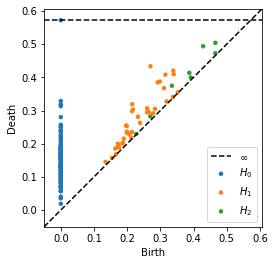

In [ ]:
import numpy as np
from ripser import Rips

rips = Rips(maxdim=2)
data = np.random.random((100,3))
diagrams = rips.fit_transform(data)
rips.plot(diagrams)

Load libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import  MinMaxScaler

from ripser import Rips

In [ ]:
def plot_barcodes(diagrams,dimension=0,colors='grey',line_width=2,title=None):
  """
  Fuction for plotting barcode diagrams
  
  Input:
    diagrams: result of rips.fit_transform
    dimension: dimension for which the barcodes will be plotted
    colors: color of bars
    line_width: width of bars
    title: tile of graph
  
  Output:
    a matplotlib graph
  """
  if (title is None):
    title="Dimension "+str(dimension)
  barcodes=pd.DataFrame(diagrams[dimension],columns=['start','end'])
  fig, ax = plt.subplots()
  plt.hlines(y=list(barcodes.index), xmin=list(barcodes.start), xmax=list(barcodes.end), colors=colors, lw=line_width, label=title)
  plt.legend(loc='lower right')
  plt.show()

### Two squares

In [ ]:
data1 = np.random.random((100,2))
data2 = np.random.random((100,2))+5
data = pd.DataFrame(data1,columns=['x','y'])
data = data.append(pd.DataFrame(data2,columns=['x','y']))

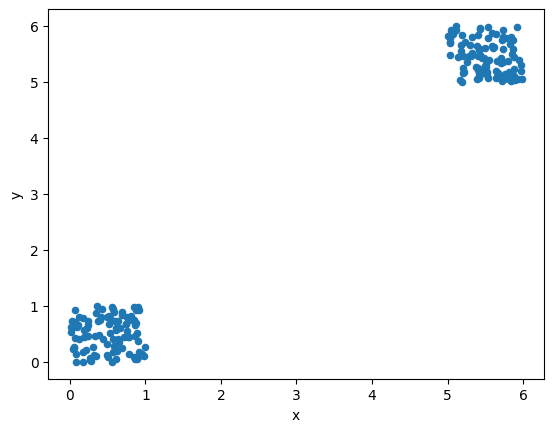

In [ ]:
data.plot.scatter(x='x',y='y')

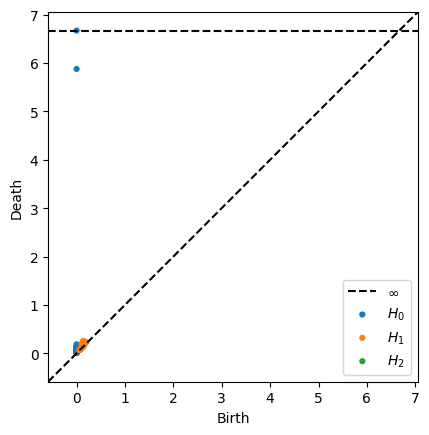

In [ ]:
diagrams = rips.fit_transform(data)
rips.plot(diagrams)

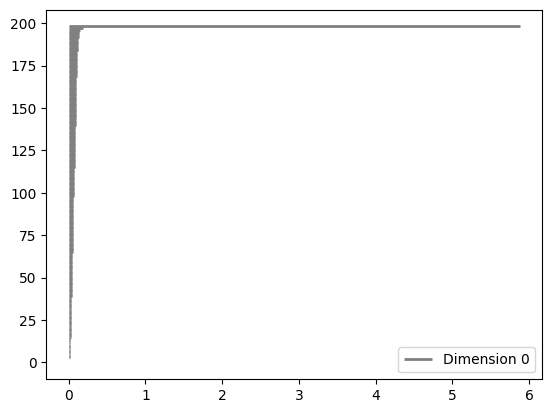

In [ ]:
plot_barcodes(diagrams)

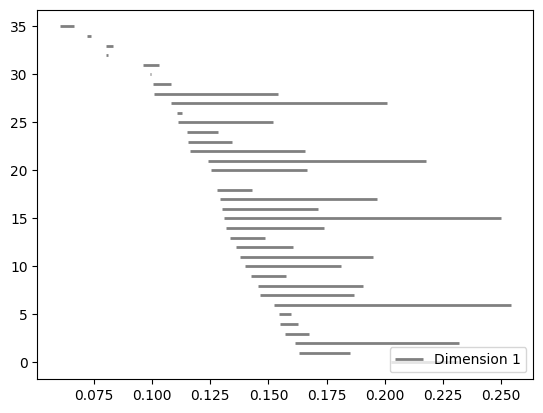

In [ ]:
plot_barcodes(diagrams,dimension=1)

### Two circles

In [ ]:
# set number of points
# n for inner circle
# 2n for outter
# 3n in total
n=500
data1_radius = pd.DataFrame(np.random.random((n,1))+1,columns=['r'])
data1_angle = pd.DataFrame(np.random.random((n,1))*2*np.pi,columns=['a'])
data1=pd.concat([data1_radius,data1_angle],axis=1)
data2_angle = pd.DataFrame(np.random.random((2*n,1))*2*np.pi,columns=['a'])
data2_radius = pd.DataFrame((np.random.random((2*n,1))+1)*5,columns=['r'])
data2=pd.concat([data2_radius,data2_angle],axis=1)
data = data1.append(data2)

In [ ]:
data['x']=data['r']*np.cos(data['a'])
data['y']=data['r']*np.sin(data['a'])

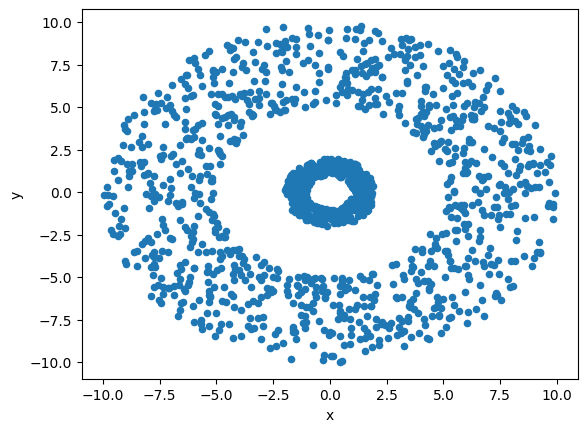

In [ ]:
data.plot.scatter(x='x',y='y')

Rips(maxdim=2, thresh=10, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


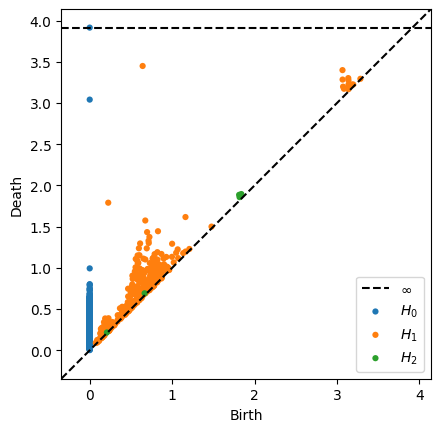

In [ ]:
rips = Rips(maxdim=2,thresh=10)
diagrams = rips.fit_transform(data[['x','y']])
rips.plot(diagrams)

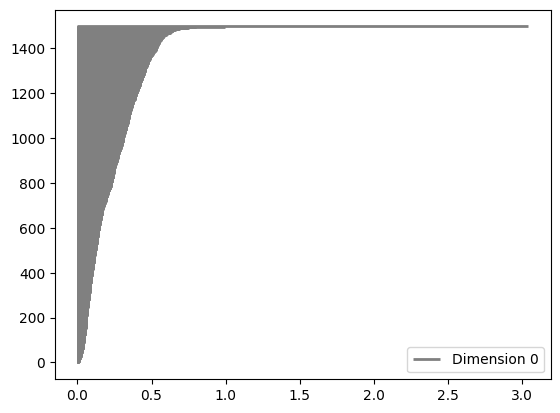

In [ ]:
plot_barcodes(diagrams)

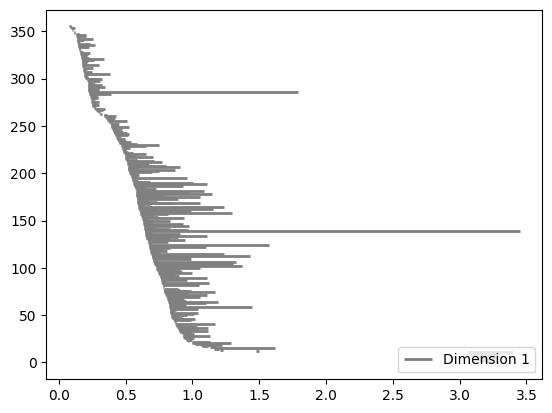

In [ ]:
plot_barcodes(diagrams,dimension=1)

## Iris dataset

In [ ]:
iris =  datasets.load_iris()
X = iris.data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled= pd.DataFrame(X_scaled)

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


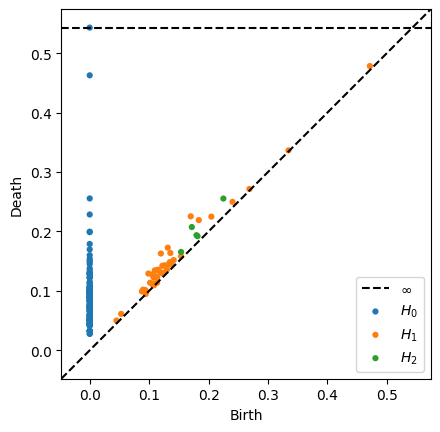

In [ ]:
rips = Rips(maxdim=2)
diagrams = rips.fit_transform(X_scaled)
rips.plot(diagrams)

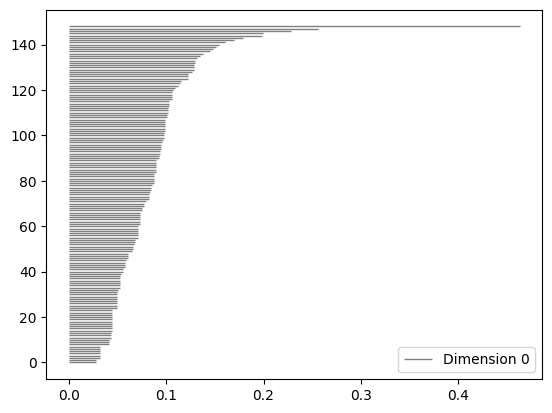

In [ ]:
plot_barcodes(diagrams,line_width=1)

## Bank Marketing

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2022-01-06 22:15:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip’

bank-additional.zip 100%[===================>] 434.15K  1.77MB/s    in 0.2s    

2022-01-06 22:15:17 (1.77 MB/s) - ‘bank-additional.zip’ saved [444572/444572]



In [ ]:
!unzip 'bank-additional.zip'

Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  


In [ ]:
data=pd.read_csv('bank-additional/bank-additional-full.csv',sep=';')

In [ ]:
data= data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]

In [ ]:
data['default'] = data['default'].map({'yes': 1, 'no': 0})
data['housing'] = data['housing'].map({'yes': 1, 'no': 0})
data['loan'] = data['loan'].map({'yes': 1, 'no': 0})

In [ ]:
data['education'] = data['education'].map({'illiterate':0, 'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4,
                                           'professional.course':5, 'university.degree':6})

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import  MinMaxScaler
enc = OneHotEncoder(sparse=False,handle_unknown='error')
data_enc = enc.fit_transform(data[['job']])

In [ ]:
cols=list(enc.categories_[0])[:-1]
cols.append('unknown_job')
job = pd.DataFrame(data_enc,columns=cols)

In [ ]:
data = pd.concat([data, job], axis=1)

In [ ]:
enc = OneHotEncoder(sparse=False,handle_unknown='error')
data_enc = enc.fit_transform(data[['marital']])
cols=list(enc.categories_[0])[:-1]
cols.append('unknown_marital')
marital = pd.DataFrame(data_enc,columns=cols)
data = pd.concat([data, marital], axis=1)

In [ ]:
data = data.drop(columns=['job','marital'])

In [ ]:
data.head()

,age,education,default,housing,loan,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown_job,divorced,married,single,unknown_marital
0,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,57,4.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
data = data[(~(data.education.isnull()))&(~(data.default.isnull()))&(~(data.housing.isnull()))&(~(data.loan.isnull()))&(data.unknown_job!=1)&(data.unknown_marital!=1)]

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)
X_scaled= pd.DataFrame(X_scaled)
X_scaled_sample = X_scaled.sample(4000,random_state=42)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


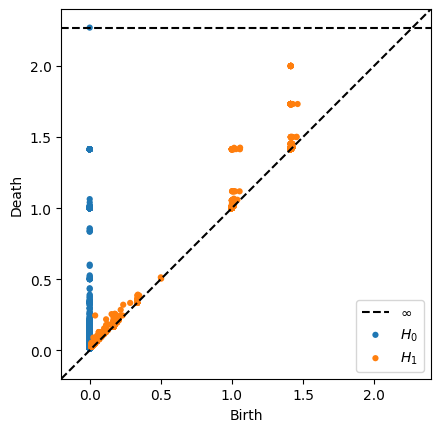

In [ ]:
rips = Rips(maxdim=1)
diagrams = rips.fit_transform(X_scaled_sample)
rips.plot(diagrams)

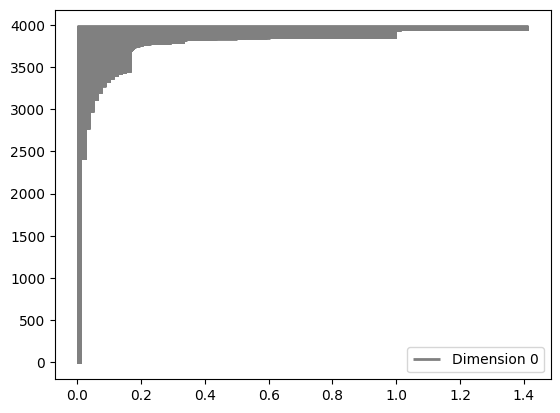

In [ ]:
plot_barcodes(diagrams,dimension=0)

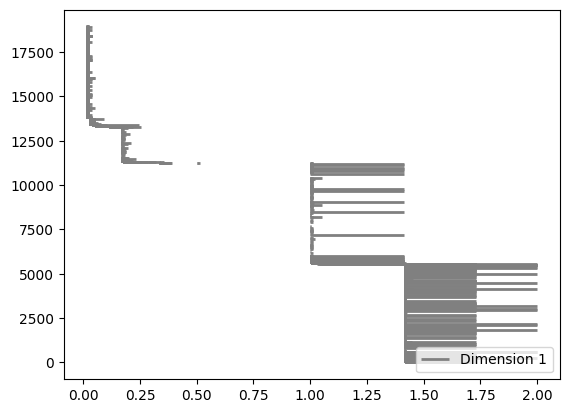

In [ ]:
plot_barcodes(diagrams,dimension=1)